In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 4

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1114 (4.35 KB)
Trainable params: 1114 (4.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 [>.............................] - ETA: 4s - loss: 1.5686 - accuracy: 0.2422
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.4526 - accuracy: 0.2963 - val_loss: 1.3132 - val_accuracy: 0.3611
Epoch 2/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.3481 - accuracy: 0.3750
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 966us/step - loss: 1.3166 - accuracy: 0.3532 - val_loss: 1.2431 - val_accuracy: 0.3993
Epoch 3/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.3290 - accuracy: 0.2969
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 995us/step - loss: 1.2501 - accuracy: 0.3765 - val_loss: 1.1719 - val_accuracy: 0.5266
Epoch 4/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.1738 - accuracy: 0.40

/Users/rayhanmohammad/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 943us/step - loss: 1.0502 - accuracy: 0.5325 - val_loss: 0.9066 - val_accuracy: 0.7171
Epoch 9/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.0206 - accuracy: 0.5156
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 946us/step - loss: 1.0225 - accuracy: 0.5447 - val_loss: 0.8592 - val_accuracy: 0.7429
Epoch 10/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.9325 - accuracy: 0.5547
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 944us/step - loss: 0.9929 - accuracy: 0.5538 - val_loss: 0.8196 - val_accuracy: 0.7496
Epoch 11/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.9815 - accuracy: 0.5391
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [===

 1/29 [>.............................] - ETA: 0s - loss: 0.6086 - accuracy: 0.7734
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 968us/step - loss: 0.6494 - accuracy: 0.7292 - val_loss: 0.3582 - val_accuracy: 0.9393
Epoch 36/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7568 - accuracy: 0.6875
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 944us/step - loss: 0.6316 - accuracy: 0.7389 - val_loss: 0.3473 - val_accuracy: 0.9351
Epoch 37/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6755 - accuracy: 0.7188
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 904us/step - loss: 0.6401 - accuracy: 0.7281 - val_loss: 0.3422 - val_accuracy: 0.9376
Epoch 38/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7128 - accuracy: 0.6797
Ep

Epoch 62/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6019 - accuracy: 0.7500
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 946us/step - loss: 0.5708 - accuracy: 0.7786 - val_loss: 0.2638 - val_accuracy: 0.9468
Epoch 63/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5214 - accuracy: 0.7891
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 959us/step - loss: 0.5546 - accuracy: 0.7725 - val_loss: 0.2576 - val_accuracy: 0.9476
Epoch 64/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7042 - accuracy: 0.7891
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 928us/step - loss: 0.5737 - accuracy: 0.7764 - val_loss: 0.2654 - val_accuracy: 0.9434
Epoch 65/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5773 - accur

Epoch 89/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5931 - accuracy: 0.7578
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 951us/step - loss: 0.5440 - accuracy: 0.7872 - val_loss: 0.2285 - val_accuracy: 0.9509
Epoch 90/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4065 - accuracy: 0.8516
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 935us/step - loss: 0.5274 - accuracy: 0.7936 - val_loss: 0.2346 - val_accuracy: 0.9493
Epoch 91/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5222 - accuracy: 0.7812
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 925us/step - loss: 0.5354 - accuracy: 0.7955 - val_loss: 0.2272 - val_accuracy: 0.9493
Epoch 92/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5062 - accur

Epoch 116/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.3695 - accuracy: 0.8438
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 942us/step - loss: 0.5122 - accuracy: 0.8060 - val_loss: 0.2139 - val_accuracy: 0.9626
Epoch 117/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4843 - accuracy: 0.8125
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 926us/step - loss: 0.5033 - accuracy: 0.7999 - val_loss: 0.2144 - val_accuracy: 0.9609
Epoch 118/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4871 - accuracy: 0.8516
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 915us/step - loss: 0.5181 - accuracy: 0.8002 - val_loss: 0.2185 - val_accuracy: 0.9617
Epoch 119/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4696 

Epoch 143/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4212 - accuracy: 0.8359
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 942us/step - loss: 0.4926 - accuracy: 0.8124 - val_loss: 0.2062 - val_accuracy: 0.9617
Epoch 144/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4717 - accuracy: 0.8125
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 939us/step - loss: 0.5022 - accuracy: 0.8083 - val_loss: 0.2014 - val_accuracy: 0.9642
Epoch 145/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4110 - accuracy: 0.8281
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 941us/step - loss: 0.4961 - accuracy: 0.8088 - val_loss: 0.2122 - val_accuracy: 0.9517
Epoch 146/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5005 

Epoch 170/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5770 - accuracy: 0.7969
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 971us/step - loss: 0.4799 - accuracy: 0.8127 - val_loss: 0.2020 - val_accuracy: 0.9601
Epoch 171/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5242 - accuracy: 0.7969
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 948us/step - loss: 0.4713 - accuracy: 0.8208 - val_loss: 0.1959 - val_accuracy: 0.9592
Epoch 172/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5187 - accuracy: 0.7969
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 931us/step - loss: 0.4842 - accuracy: 0.8185 - val_loss: 0.2059 - val_accuracy: 0.9667
Epoch 173/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5552 

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 356us/step - loss: 0.2048 - accuracy: 0.9576


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 29ms/step
[9.6819246e-01 3.1555556e-02 2.5104833e-04 1.0810138e-06]
0


# Confusion matrix

38/38 [==============================] - 0s 234us/step


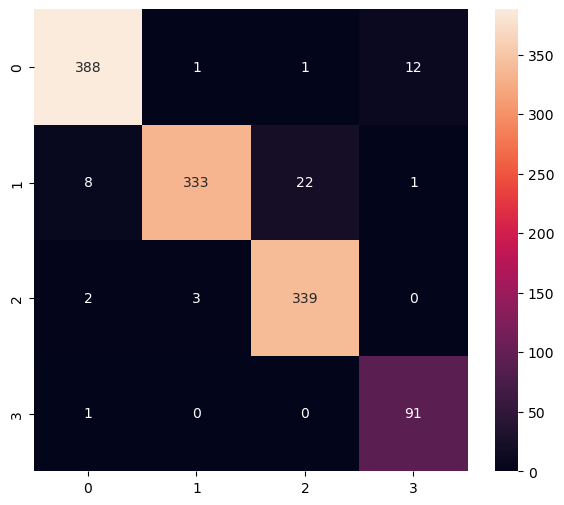

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       402
           1       0.99      0.91      0.95       364
           2       0.94      0.99      0.96       344
           3       0.88      0.99      0.93        92

    accuracy                           0.96      1202
   macro avg       0.94      0.96      0.95      1202
weighted avg       0.96      0.96      0.96      1202



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/rayhanmohammad/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/75/3wt3dr3x7cd17742qd8xs8kh0000gn/T/tmp337n01yq/assets


INFO:tensorflow:Assets written to: /var/folders/75/3wt3dr3x7cd17742qd8xs8kh0000gn/T/tmp337n01yq/assets
2024-02-22 20:32:45.079677: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-02-22 20:32:45.079691: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-02-22 20:32:45.080232: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/75/3wt3dr3x7cd17742qd8xs8kh0000gn/T/tmp337n01yq
2024-02-22 20:32:45.080748: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-02-22 20:32:45.080752: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/75/3wt3dr3x7cd17742qd8xs8kh0000gn/T/tmp337n01yq
2024-02-22 20:32:45.082549: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-02-22 20:32:45.083121: I tensorflow/cc/saved_model/load

6544

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 224 µs, sys: 548 µs, total: 772 µs
Wall time: 529 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6819234e-01 3.1555563e-02 2.5104854e-04 1.0810166e-06]
0
